<a href="https://colab.research.google.com/github/RealBest07/Embedded-System-Sut/blob/main/CNN_Marvel_hero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Advanced Topicsin Electronics Engineering (539426)**

# Machine Learning and Deep Learning with TensorFlow 

อาจารย์ ดร.มาโนทย์ มาปะโท

ภาคการศึกษาที่ 2 ปีการศึกษา 2564 

สาขาวิชาวิศวกรรมอิเล็กทรอนิกส์ มหาวิทยาลัยเทคโนโลยีสุรนารี Suranaree University of Technology


# ***Week08-2 Multi-class classification***

* ให้ศึกษาการทำงานของ code ต่อไปนี้อย่างละเอียด จากนั้นให้ make a copy เพื่อทำ **Assignment** ต่อไปนี้
1. ให้หา dataset จาก kaggle หรือ แหล่งอื่น จำนวน 4-10 Class 
2. ภาพมีขนาด 100-300 pixel ตามต้องการ
3. จำนวนข้อมูลคลาสละ 200-1000 โดยต้องมี test, train
4. จากนั้นทำการปรับจูนและ fit model ตามตัวอย่าง
5. วาด confusion matrix พร้อมทั้งคำนวน metrics ต่างๆ



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Copy Zip from google drive to content

In [ ]:
import os, shutil, pathlib
shutil.copyfile(src="/content/drive/MyDrive/AI/marvelnew.zip", dst="/content/marvelnew.zip")

'/content/marvelnew.zip'

# Unzip dataset folder

In [ ]:
!unzip -qq marvelnew.zip

#Import every things needed

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow import keras
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score, f1_score, precision_score,accuracy_score
import numpy as np
import shutil
import random
import os
tf.random.set_seed(40)

In [ ]:
# !rm -rf cats_vs_dogs_small

# Check all class, incase need to remove some

In [ ]:
class_list=train_dataset = image_dataset_from_directory("/content/marvel/train")
print(class_list.class_names)

Found 720 files belonging to 4 classes.
['black_widow', 'captaina_america', 'doctor_strange', 'ironman']


# Function for remove folder

In [ ]:
def remove_folder(path):
    if os.path.exists(path):
         shutil.rmtree(path)

In [ ]:
# remove_folder("/content/Vegetable Images")

#Function for removing some class's folder

In [ ]:
def RemoveSomeClass(classlist,keep,maindatafolder):
  for m in ["test","train","validation"]:               # look into each folder
    for i in classlist.class_names:                     # list of all class
      if i not in keep:                                 #delete other, keep these class
        remove_folder("%s/%s/%s"%(maindatafolder,m,i))  #call remove_folder function
        print("%s/%s/%s"%(maindatafolder,m,i))          #show remove_folder

# Remove and keep some class

In [ ]:
RemoveSomeClass(class_list,
                ["Bean","Brinjal","Carrot","Cucumber","Pumpkin","Radish"], # keep these, romove other
                "/content/Vegetable Images")

/content/Vegetable Images/test/Bitter_Gourd
/content/Vegetable Images/test/Bottle_Gourd
/content/Vegetable Images/test/Broccoli
/content/Vegetable Images/test/Cabbage
/content/Vegetable Images/test/Capsicum
/content/Vegetable Images/test/Cauliflower
/content/Vegetable Images/test/Papaya
/content/Vegetable Images/test/Potato
/content/Vegetable Images/test/Tomato
/content/Vegetable Images/train/Bitter_Gourd
/content/Vegetable Images/train/Bottle_Gourd
/content/Vegetable Images/train/Broccoli
/content/Vegetable Images/train/Cabbage
/content/Vegetable Images/train/Capsicum
/content/Vegetable Images/train/Cauliflower
/content/Vegetable Images/train/Papaya
/content/Vegetable Images/train/Potato
/content/Vegetable Images/train/Tomato
/content/Vegetable Images/validation/Bitter_Gourd
/content/Vegetable Images/validation/Bottle_Gourd
/content/Vegetable Images/validation/Broccoli
/content/Vegetable Images/validation/Cabbage
/content/Vegetable Images/validation/Capsicum
/content/Vegetable Images/

# Function for Read dataset and resize image

This function return:  
* train_dataset
* validation_dataset
* test_dataset
* class_list

In [ ]:
def Import_and_Resize(dataset_dir,image_size=180,batch_size=32):
  class_list=train_dataset = image_dataset_from_directory(dataset_dir+"/train",
  image_size=(image_size, image_size),batch_size=batch_size,shuffle=False)

  validation_dataset = image_dataset_from_directory(dataset_dir+"/validation",
  image_size=(image_size, image_size),batch_size=batch_size,shuffle=False)

  test_dataset = image_dataset_from_directory(dataset_dir+"/test",
  image_size=(image_size, image_size),batch_size=batch_size,shuffle=False)
  print("\nClass name list: %s" %class_list.class_names)

  return train_dataset,validation_dataset,test_dataset,class_list

# Random check some image

In [ ]:
def load_and_prep_image(filename, img_shape=180):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.resize(img, size = [img_shape, img_shape])
  return img

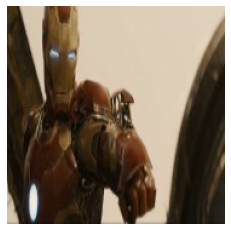

In [ ]:
# <<<< Run again and again for visualize pictures
listclass=os.listdir("/content/marvel/validation")
randclass=random.choice(listclass)
listpic=os.listdir("/content/marvel/validation/%s"%randclass)
randpic=random.choice(listpic)

img=load_and_prep_image("/content/marvel/validation/%s/%s"%(randclass,randpic))
img1 = img/255.0
plt.imshow(img1)
plt.axis(False)
plt.show()

#Call "ImportAdnResize" to import dataset

In [ ]:
train_dataset,validation_dataset,test_dataset,class_list=Import_and_Resize("/content/marvel",
                                                                image_size=120)

Found 720 files belonging to 4 classes.
Found 80 files belonging to 4 classes.
Found 80 files belonging to 4 classes.

Class name list: ['black_widow', 'captaina_america', 'doctor_strange', 'ironman']


# Data augmentation setting

In [ ]:
data_augmentation = keras.Sequential(
[ layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2)]
                                    )

# Create CNN model

In [ ]:
imagesize=120
inputs = keras.Input(shape=(imagesize, imagesize, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.2)(x)
# x = layers.Dense(50, activation="relu")(x)
outputs = layers.Dense(4, activation="softmax")(x)  # change number of neuron equal to number of class
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()
loss='categorical_crossentropy',

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
optimizer=tf.keras.optimizers.Adam(lr=0.0001),
metrics=["accuracy"])

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 120, 120, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 120, 120, 3)       0         
                                                                 
 rescaling_9 (Rescaling)     (None, 120, 120, 3)       0         
                                                                 
 conv2d_36 (Conv2D)          (None, 118, 118, 32)      896       
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 59, 59, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 57, 57, 64)        18496     
                                                           

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


#Fit the model

In [ ]:
his = model.fit(
train_dataset,
epochs=250,
batch_size=32,
validation_data=validation_dataset)

Epoch 1/250
23/23 [==============================] - 4s 86ms/step - loss: 1.7041 - accuracy: 0.2083 - val_loss: 1.3979 - val_accuracy: 0.2750
Epoch 2/250
23/23 [==============================] - 2s 73ms/step - loss: 1.3787 - accuracy: 0.2111 - val_loss: 1.3863 - val_accuracy: 0.2500
Epoch 3/250
23/23 [==============================] - 2s 69ms/step - loss: 1.3880 - accuracy: 0.2097 - val_loss: 1.3857 - val_accuracy: 0.2875
Epoch 4/250
23/23 [==============================] - 1s 51ms/step - loss: 1.3875 - accuracy: 0.2139 - val_loss: 1.3853 - val_accuracy: 0.2875
Epoch 5/250
23/23 [==============================] - 1s 51ms/step - loss: 1.3872 - accuracy: 0.2236 - val_loss: 1.3850 - val_accuracy: 0.3000
Epoch 6/250
23/23 [==============================] - 1s 52ms/step - loss: 1.3872 - accuracy: 0.2236 - val_loss: 1.3845 - val_accuracy: 0.3000
Epoch 7/250
23/23 [==============================] - 1s 52ms/step - loss: 1.3865 - accuracy: 0.2319 - val_loss: 1.3842 - val_accuracy: 0.3125
Epoch 

# Save and load the trained model

In [ ]:
model.save("/content/drive/MyDrive/AI/save/B6224547modelmarvel.h5")

In [ ]:
model=models.load_model("/content/drive/MyDrive/AI/save/B6224547modelmarvel.h5")

#function for plotting the history and accuracy

In [ ]:
def plotloss_acc(his):
  # summarize history for accuracy
  plt.plot(his.history['accuracy'])
  plt.plot(his.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(his.history['loss'])
  plt.plot(his.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

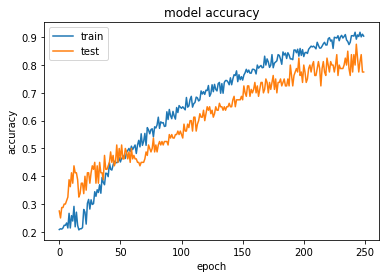

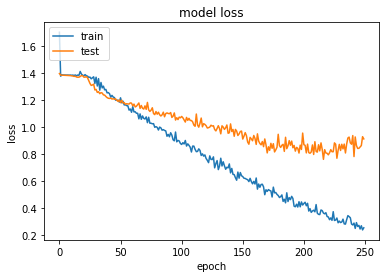

In [ ]:
plotloss_acc(his)

# Function for multiclass prediction and plot image

In [ ]:
def multiclass_pred_plot(model, filename, class_names, img_shape=180):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.resize(img, size = [img_shape, img_shape])
  pred = model.predict(tf.expand_dims(img, axis=0))
  pred_class=pred.argmax(axis=1)
  img1 = img/255.
  plt.imshow(img1)
  plt.title("Prediction: %s"%class_names[pred_class[0]])
  # plt.axis(False);
  plt.show()
  return pred

#Command for listing all picture in specific folder and random 

In [ ]:
listpic=os.listdir("/content/marvel/validation/ironman")
random.choice(listpic)

'ironman  (16).jpg'

#Predict and plot random item

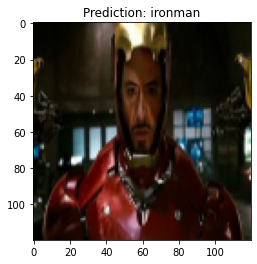

[[1.604927e-03]
 [8.250433e-05]
 [8.150278e-04]
 [9.974975e-01]] ['black_widow', 'captaina_america', 'doctor_strange', 'ironman']


In [ ]:
listclass=os.listdir("/content/marvel/validation")
randclass=random.choice(listclass)

listpic=os.listdir("/content/marvel/validation/%s"%randclass)
randpic=random.choice(listpic)


pred=multiclass_pred_plot(model,("/content/marvel/validation/%s/%s"%(randclass,randpic)),
           class_list.class_names,
           img_shape=120)  
print(pred.reshape(4,1),class_list.class_names)

### Predict pictures from the internet

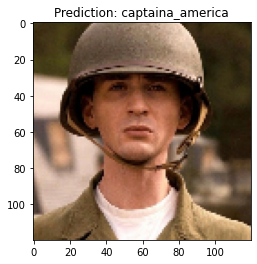

[[0.35356712]
 [0.505802  ]
 [0.12797396]
 [0.01265698]] ['black_widow', 'captaina_america', 'doctor_strange', 'ironman']


In [ ]:
pred=multiclass_pred_plot(model,"/content/Captain-America-Featured-Image.jpg",
           class_list.class_names,
           img_shape=120)  
print(pred.reshape(4,1),class_list.class_names)

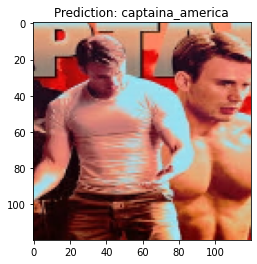

[[1.0782841e-05]
 [9.6685034e-01]
 [3.0493049e-02]
 [2.6457952e-03]] ['black_widow', 'captaina_america', 'doctor_strange', 'ironman']


In [ ]:
pred=multiclass_pred_plot(model,"/content/images.jpg",
           class_list.class_names,
           img_shape=120)  
print(pred.reshape(4,1),class_list.class_names)

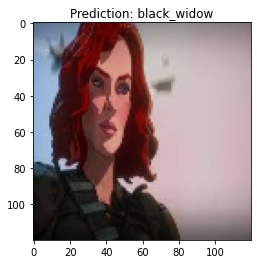

[[9.2649150e-01]
 [1.8979075e-05]
 [3.9294005e-06]
 [7.3485598e-02]] ['black_widow', 'captaina_america', 'doctor_strange', 'ironman']


In [ ]:
pred=multiclass_pred_plot(model,"/content/download (1).jfif",
           class_list.class_names,
           img_shape=120)  
print(pred.reshape(4,1),class_list.class_names)

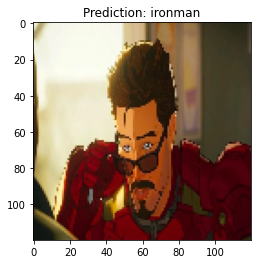

[[7.7268787e-06]
 [6.7617968e-08]
 [4.8423553e-01]
 [5.1575673e-01]] ['black_widow', 'captaina_america', 'doctor_strange', 'ironman']


In [ ]:
pred=multiclass_pred_plot(model,"/content/what-if-episode-3-tony-stark-1200.jpg",
           class_list.class_names,
           img_shape=120)  
print(pred.reshape(4,1),class_list.class_names)

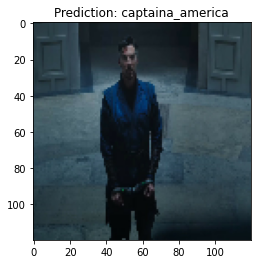

[[0.01828924]
 [0.948602  ]
 [0.0047287 ]
 [0.02838009]] ['black_widow', 'captaina_america', 'doctor_strange', 'ironman']


In [ ]:
pred=multiclass_pred_plot(model,"/content/image_2022_02_13_184739.0.jfif",
           class_list.class_names,
           img_shape=120)  
print(pred.reshape(4,1),class_list.class_names)

รูปสุดท้ายทำให้เห็นว่าAIแยกรูปจากสีไม่ใช่หน้าตา

#Function for confusion matrix plotting

In [ ]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 

  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.cool) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  ax.tick_params(axis='x', labelsize=text_size)
  ax.tick_params(axis='y', labelsize=text_size)
  ax.set_xlabel("Predicted label",fontsize = text_size)
  ax.set_ylabel("True label",fontsize = text_size)
  ax.set_title("Confusion Matrix",fontsize = text_size)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

# Predict the model for confusion matrix plot

In [ ]:
y_probs = model.predict(train_dataset)
y_preds = y_probs.argmax(axis=1)
y_preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 3, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,

In [ ]:
y_train = np.concatenate([y for x, y in train_dataset], axis=0)
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
confusion_matrix(y_true=y_train, 
                 y_pred=y_preds)

array([[176,   2,   1,   1],
       [  7, 168,   2,   3],
       [  2,   1, 175,   2],
       [  5,   2,   1, 172]])

# Function for Calculating performance metrics
* Precision
* Recall
* F1 score
* Accuracy

In [ ]:
def metricscal(y_true,y_preds):
  prec=precision_score(y_true,y_preds,average='micro')
  reca=recall_score(y_true,y_preds,average='micro')
  f1s=f1_score(y_true,y_preds,average='micro')
  accu=accuracy_score(y_true,y_preds)
  return prec,reca,f1s,accu

In [ ]:
 prec,reca,f1s,accu=metricscal(y_train,y_preds)
 print("Precision= %.5f\nRecall= %.5f\nF1 score= %.5f\nAccuracy= %.5f"%(prec,reca,f1s,accu))

Precision= 0.95972
Recall= 0.95972
F1 score= 0.95972
Accuracy= 0.95972


# Plot confusion matrix

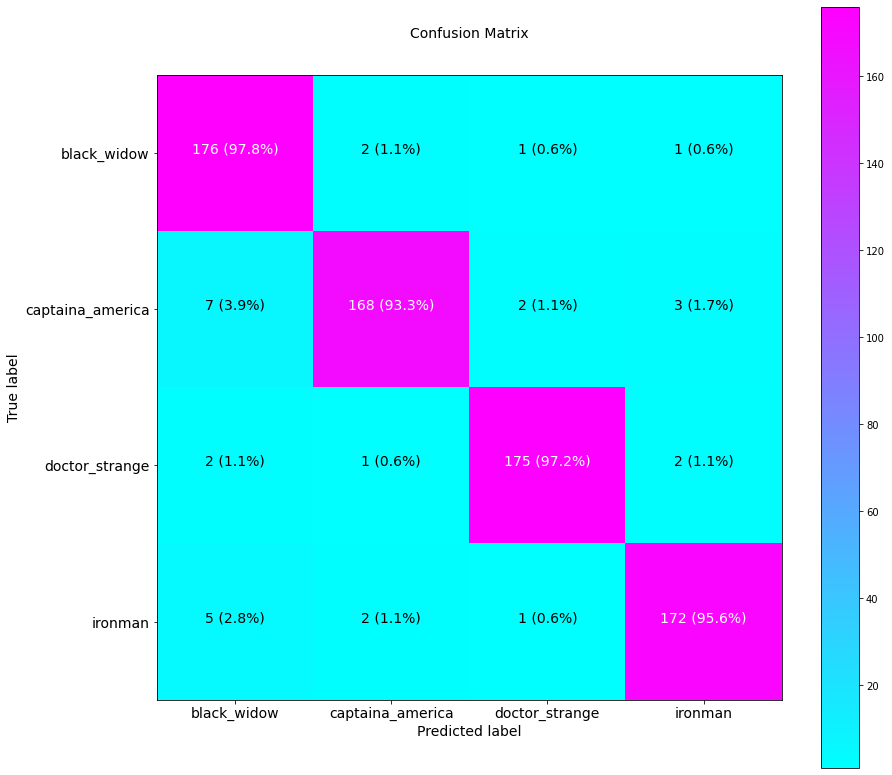

In [ ]:
# Make a pretty confusion matrix
make_confusion_matrix(y_true=y_train, 
                      y_pred=y_preds,
                      classes=class_list.class_names,
                      figsize=(14, 14),
                      text_size=14)

